<a href="https://colab.research.google.com/github/Raghav-1548/Cancer-Cell-Detection/blob/main/cancer_cell_detection_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import os 
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(42)
from sklearn.metrics import confusion_matrix
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
skin_df = pd.read_csv('/content/drive/MyDrive/Cancer Cell/HAM10000_metadata.csv')
SIZE=32

In [ ]:
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:
skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extremity      5  
8984  lower extremity      5  
2310 

In [ ]:
fig = plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

In [ ]:
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax = ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')


Text(0.5, 1.0, 'Cell Type')

In [ ]:
ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax = ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex')

Text(0.5, 1.0, 'Sex')

Text(0.5, 1.0, 'Localization')

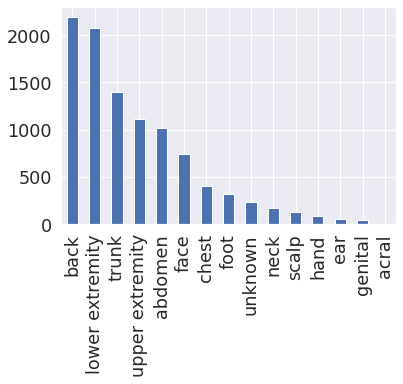

In [ ]:
ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count', size=12)
ax3.set_title('Localization')

Text(0.5, 1.0, 'Age')

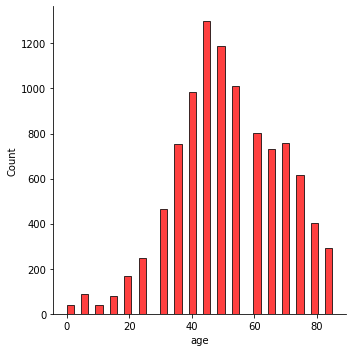

In [ ]:
ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.displot(sample_age['age'], color='red')
ax4.set_title('Age')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.utils import resample
print(skin_df['label'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    4
Name: label, Length: 10015, dtype: int64>


In [ ]:
df_0 = skin_df[skin_df['label']==0]
df_1 = skin_df[skin_df['label']==1]
df_2 = skin_df[skin_df['label']==2]
df_3 = skin_df[skin_df['label']==3]
df_4 = skin_df[skin_df['label']==4]
df_5 = skin_df[skin_df['label']==5]
df_6 = skin_df[skin_df['label']==6]


In [ ]:
n_samples= 500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [ ]:
print(skin_df_balanced['label'].value_counts())

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


In [ ]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/drive/MyDrive/Cancer Cell/', '*', '*.jpg'))}

skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

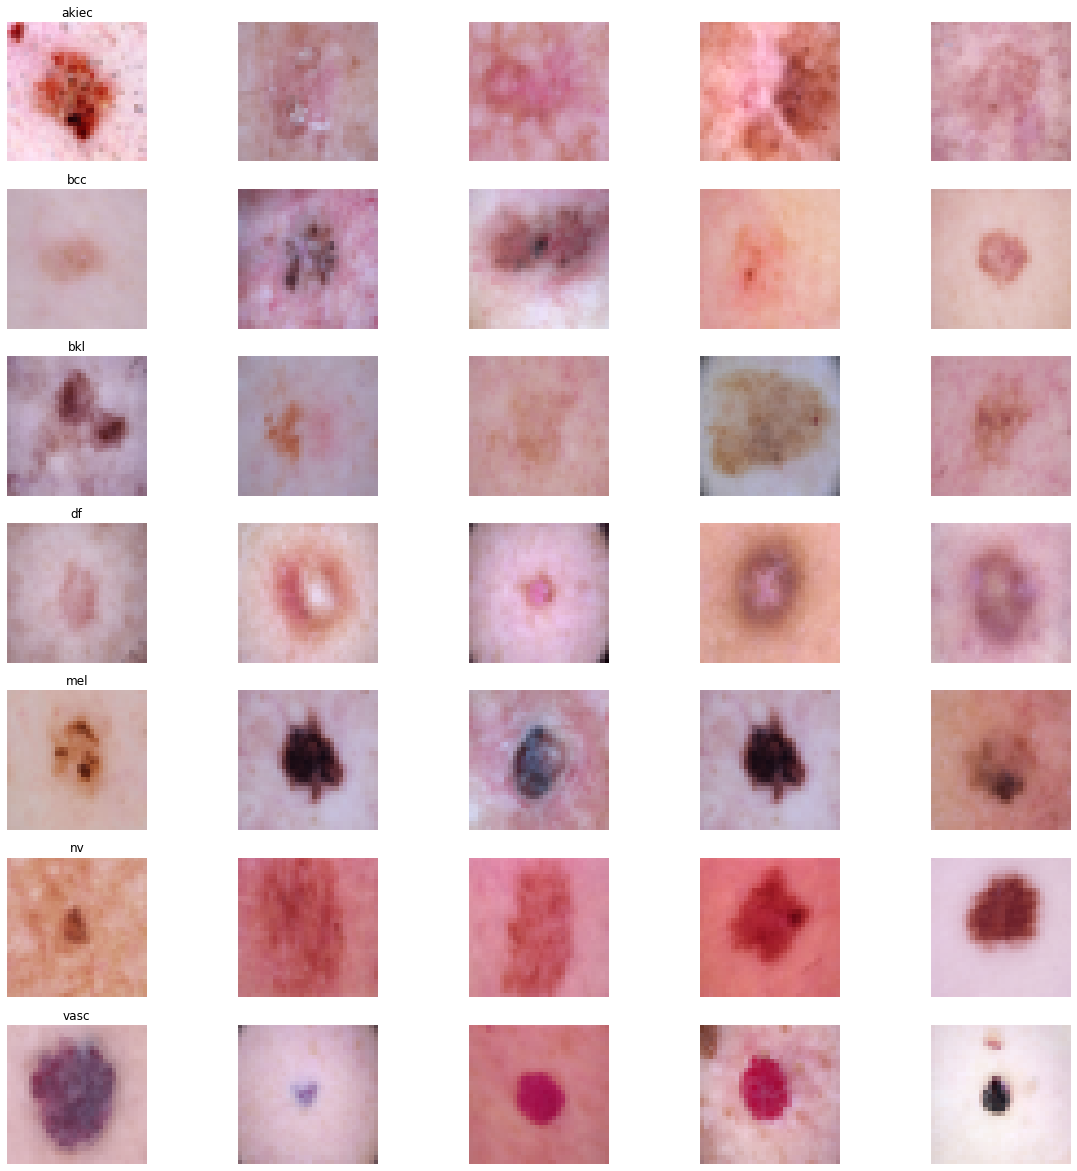

In [ ]:
from PIL import Image
n_samples = 5 

fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        img = Image.fromarray(c_row['image'].astype('uint8'), 'RGB')
        img.save('temp.png')
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [ ]:

skin_df_balanced.dropna(inplace=True)
if skin_df_balanced['path'].notnull().sum() > 0:
    X = np.asarray(skin_df_balanced['image'].tolist())
    X = X/255.  
    Y=skin_df_balanced['label']  
    Y_cat = to_categorical(Y, num_classes=7) 
    x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)
else:
    print("No valid path values in skin_df_balanced DataFrame.")



In [ ]:
num_classes = 7


In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))

model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(128, (3, 3),activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(64, (3, 3),activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())


In [ ]:
model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


In [ ]:
batch_size = 16 
epochs = 50

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/50
164/164 - 32s - loss: 1.9467 - acc: 0.1525 - val_loss: 1.9411 - val_acc: 0.1514 - 32s/epoch - 194ms/step
Epoch 2/50
164/164 - 29s - loss: 1.8508 - acc: 0.2290 - val_loss: 1.7563 - val_acc: 0.2649 - 29s/epoch - 174ms/step
Epoch 3/50
164/164 - 29s - loss: 1.7206 - acc: 0.2890 - val_loss: 1.6656 - val_acc: 0.3119 - 29s/epoch - 175ms/step
Epoch 4/50
164/164 - 30s - loss: 1.5598 - acc: 0.3708 - val_loss: 1.4735 - val_acc: 0.3830 - 30s/epoch - 181ms/step
Epoch 5/50
164/164 - 29s - loss: 1.4534 - acc: 0.4109 - val_loss: 1.3657 - val_acc: 0.4289 - 29s/epoch - 175ms/step
Epoch 6/50
164/164 - 29s - loss: 1.4006 - acc: 0.4530 - val_loss: 1.3707 - val_acc: 0.4266 - 29s/epoch - 175ms/step
Epoch 7/50
164/164 - 29s - loss: 1.3337 - acc: 0.4694 - val_loss: 1.3047 - val_acc: 0.4587 - 29s/epoch - 174ms/step
Epoch 8/50
164/164 - 29s - loss: 1.3048 - acc: 0.4870 - val_loss: 1.3074 - val_acc: 0.4369 - 29s/epoch - 174ms/step
Epoch 9/50
164/164 - 29s - loss: 1.2561 - acc: 0.5023 - val_loss: 1.3204

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1]*100)

28/28 [==============================] - 2s 78ms/step - loss: 0.8739 - acc: 0.6984
Test accuracy: 69.83944773674011


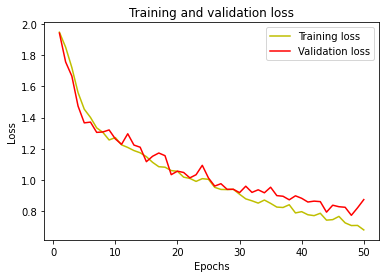

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


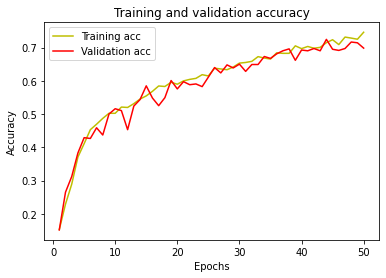

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis = 1) 

y_true = np.argmax(y_test, axis = 1) 

28/28 [==============================] - 2s 78ms/step


In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

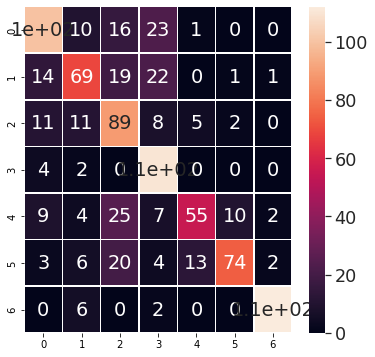

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

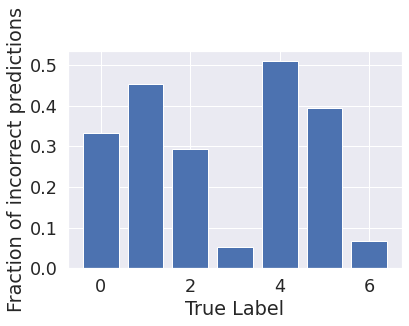

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Cancer Cell/saved model/cancercell.h5')